# Inspect Point Source Calibration Results

This notebook loads and inspects the pickled results from `PointSourceCalibrationPlugin`.

The plugin saves `model_components` containing:
- Gain solutions per receiver
- Temperature model components (atmospheric, point source, receiver, spillover)
- Beam gains for both polarizations

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import gc
from astropy.time import Time

# Set up plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## 1. Load the pickle file

Update the path below to point to your actual results directory.

In [11]:
# Update this path to your actual results directory
pickle_path = '/idia/users/msantos/museek/1675021905/point_source_calibration0_plugin.pickle'

# Load the pickle file
with open(pickle_path, 'rb') as f:
    context = pickle.load(f)

print(f"Loaded context with keys: {list(context.keys())}")

Loaded context with keys: ['loop: {\nmuseek.plugin.in_plugin\nmuseek.plugin.noise_diode_flagger_plugin\nmuseek.plugin.known_rfi_plugin\nmuseek.plugin.rawdata_flagger_plugin\nmuseek.plugin.scan_track_split_plugin\nmuseek.plugin.extract_calibrators_plugin\nmuseek.plugin.antenna_flagger_plugin\nmuseek.plugin.aoflagger_tracking_plugin\nmuseek.plugin.point_source_calibration0_plugin\nhash 8757552172567\n}', 'params', 'plugins', 'timings', <ContextStorageEnum.FILE_NAME: 2>, <ContextStorageEnum.DIRECTORY: 1>, <ResultEnum.FLAG_REPORT_WRITER: 14>, <ResultEnum.DATA: 1>, <ResultEnum.RECEIVERS: 4>, <ResultEnum.OBSERVATION_DATE: 6>, <ResultEnum.BLOCK_NAME: 7>, <ResultEnum.OUTPUT_PATH: 5>, <ResultEnum.FLAG_NAME_LIST: 23>, <ResultEnum.SCAN_DATA: 2>, <ResultEnum.TRACK_DATA: 3>, <ResultEnum.SCAN_OBSERVATION_START: 12>, <ResultEnum.SCAN_OBSERVATION_END: 13>, <ResultEnum.CALIBRATOR_VALIDATED_PERIODS: 26>, <ResultEnum.CALIBRATOR_DUMP_INDICES: 27>, <ResultEnum.CALIBRATOR_NAMES: 28>, <ResultEnum.MODEL_COMPO

## 2. Access model_components

The `model_components` is stored as a result using `ResultEnum.MODEL_COMPONENTS`.

In [12]:
# Access model_components from context using ResultEnum
from museek.enums.result_enum import ResultEnum

print(context.keys())
track_data = context.get(ResultEnum.TRACK_DATA).result
model_components = context.get(ResultEnum.MODEL_COMPONENTS).result

del context
gc.collect()

dict_keys(['loop: {\nmuseek.plugin.in_plugin\nmuseek.plugin.noise_diode_flagger_plugin\nmuseek.plugin.known_rfi_plugin\nmuseek.plugin.rawdata_flagger_plugin\nmuseek.plugin.scan_track_split_plugin\nmuseek.plugin.extract_calibrators_plugin\nmuseek.plugin.antenna_flagger_plugin\nmuseek.plugin.aoflagger_tracking_plugin\nmuseek.plugin.point_source_calibration0_plugin\nhash 8757552172567\n}', 'params', 'plugins', 'timings', <ContextStorageEnum.FILE_NAME: 2>, <ContextStorageEnum.DIRECTORY: 1>, <ResultEnum.FLAG_REPORT_WRITER: 14>, <ResultEnum.DATA: 1>, <ResultEnum.RECEIVERS: 4>, <ResultEnum.OBSERVATION_DATE: 6>, <ResultEnum.BLOCK_NAME: 7>, <ResultEnum.OUTPUT_PATH: 5>, <ResultEnum.FLAG_NAME_LIST: 23>, <ResultEnum.SCAN_DATA: 2>, <ResultEnum.TRACK_DATA: 3>, <ResultEnum.SCAN_OBSERVATION_START: 12>, <ResultEnum.SCAN_OBSERVATION_END: 13>, <ResultEnum.CALIBRATOR_VALIDATED_PERIODS: 26>, <ResultEnum.CALIBRATOR_DUMP_INDICES: 27>, <ResultEnum.CALIBRATOR_NAMES: 28>, <ResultEnum.MODEL_COMPONENTS: 29>])


13491

## 3. Inspect structure for one period

In [13]:
# Get first period
period = list(model_components.keys())[0]
period_data = model_components[period]

print(f"\nPeriod: {period}")
print(f"Calibrator: {period_data['calibrator']}")
print(f"Dump indices: {period_data['dump_indices'][:5]}... (showing first 5)")
print(f"\nTop-level keys: {list(period_data.keys())}")
print(f"\nTemperature components: {list(period_data['temperatures'].keys())}")


Period: before_scan
Calibrator: HydraA
Dump indices: [76, 77, 78, 79, 80]... (showing first 5)

Top-level keys: ['calibrator', 'dump_indices', 'gain', 'beam_gain_HH', 'beam_gain_VV', 'temperatures']

Temperature components: ['atmospheric', 'point_source_HH', 'point_source_VV', 'receiver', 'spillover_HH', 'spillover_VV']


## 4. Check array shapes

In [14]:
print(f"\nArray shapes for period '{period}':")
print(f"\nReceiver-specific (with receiver dimension):")
print(f"  gain: {period_data['gain'].shape} -> (n_freq, n_receivers)")
print(f"  atmospheric: {period_data['temperatures']['atmospheric'].shape} -> (n_dumps, n_freq, n_receivers)")
print(f"  receiver: {period_data['temperatures']['receiver'].shape} -> (n_freq, n_receivers)")

print(f"\nReceiver-independent (no receiver dimension):")
print(f"  beam_gain_HH: {period_data['beam_gain_HH'].shape} -> (n_dumps, n_freq)")
print(f"  beam_gain_VV: {period_data['beam_gain_VV'].shape} -> (n_dumps, n_freq)")
print(f"  point_source_HH: {period_data['temperatures']['point_source_HH'].shape} -> (n_dumps, n_freq)")
print(f"  point_source_VV: {period_data['temperatures']['point_source_VV'].shape} -> (n_dumps, n_freq)")
print(f"  spillover_HH: {period_data['temperatures']['spillover_HH'].shape} -> (n_dumps, n_freq)")
print(f"  spillover_VV: {period_data['temperatures']['spillover_VV'].shape} -> (n_dumps, n_freq)")

n_dumps, n_freq = period_data['beam_gain_HH'].shape
n_receivers = period_data['gain'].shape[1]

print(f"\nDimensions:")
print(f"  n_dumps: {n_dumps}")
print(f"  n_freq: {n_freq}")
print(f"  n_receivers: {n_receivers}")


Array shapes for period 'before_scan':

Receiver-specific (with receiver dimension):
  gain: (4096, 4) -> (n_freq, n_receivers)
  atmospheric: (225, 4096, 4) -> (n_dumps, n_freq, n_receivers)
  receiver: (4096, 4) -> (n_freq, n_receivers)

Receiver-independent (no receiver dimension):
  beam_gain_HH: (225, 4096) -> (n_dumps, n_freq)
  beam_gain_VV: (225, 4096) -> (n_dumps, n_freq)
  point_source_HH: (225, 4096) -> (n_dumps, n_freq)
  point_source_VV: (225, 4096) -> (n_dumps, n_freq)
  spillover_HH: (225, 4096) -> (n_dumps, n_freq)
  spillover_VV: (225, 4096) -> (n_dumps, n_freq)

Dimensions:
  n_dumps: 225
  n_freq: 4096
  n_receivers: 4


## 5. Plot gain solutions

In [37]:
freq_MHz = track_data.frequencies.squeeze/1.0e6
times = track_data.timestamps.squeeze
dumps = np.array(track_data._dumps()) 
flags = track_data.flags.combine(threshold=1)

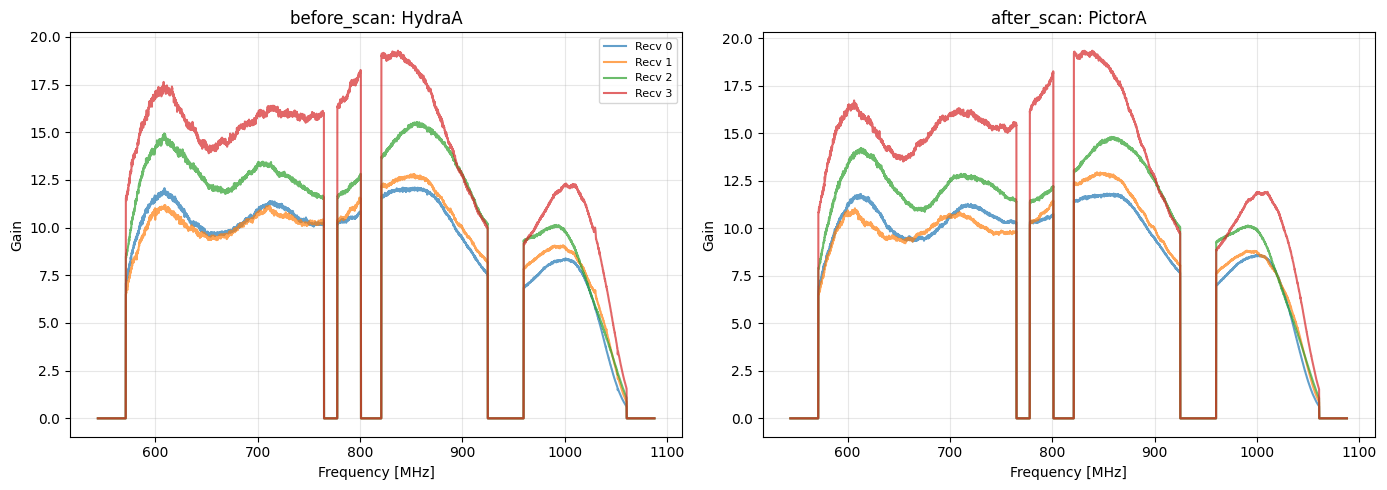

In [21]:
# Get frequency axis (need to get from context or calculate)

# Plot gain for some receivers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for period_name, period_data in model_components.items():
    gains = period_data['gain']  # (n_freq, n_receivers)
    calibrator = period_data['calibrator']
    
    # Plot first 10 receivers for clarity
    ax = axes[0] if 'before' in period_name else axes[1]
    
    for i_recv in range(4):
        ax.plot(freq_MHz, gains[:, i_recv], alpha=0.7, label=f'Recv {i_recv}' if period_name == list(model_components.keys())[0] else None)
    
    ax.set_xlabel('Frequency [MHz]')
    ax.set_ylabel('Gain')
    ax.set_title(f'{period_name}: {calibrator}')
    ax.grid(True, alpha=0.3)

axes[0].legend(loc='best', fontsize=8)
plt.tight_layout()
plt.show()

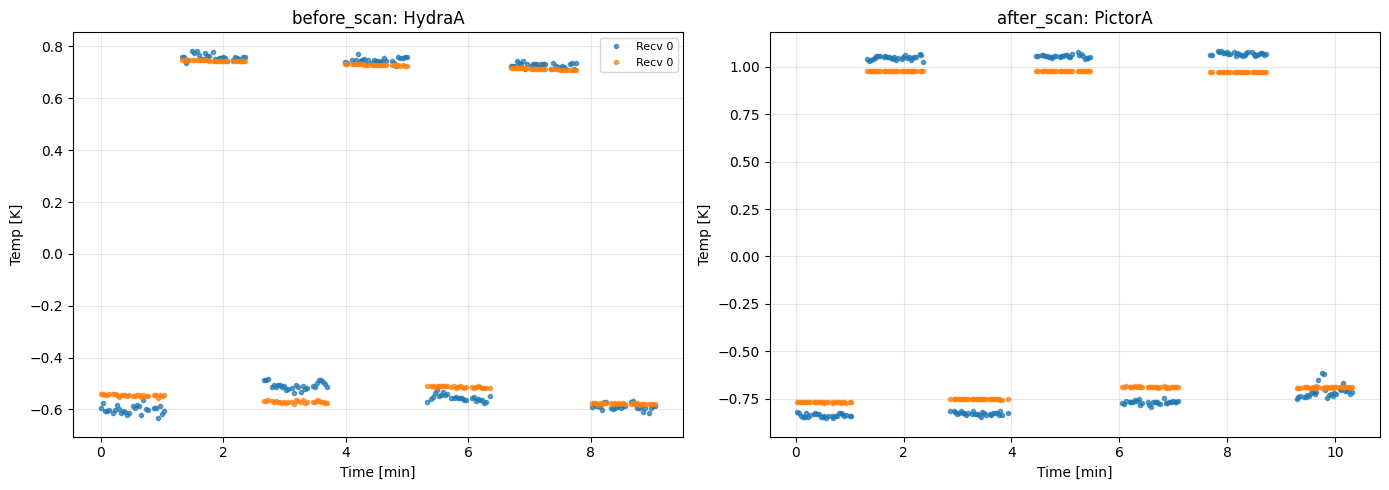

In [49]:
i_receiver = 0
vis = track_data.visibility
polarisation = track_data.receivers[i_receiver].polarisation

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for period_name, period_data in model_components.items():
    gains = period_data['gain']  # (n_freq, n_receivers)
    calibrator = period_data['calibrator']
    dump_period = period_data['dump_indices']
    select = np.isin(dumps, dump_period)
    times_period = times[select]/60
    times_period = times_period - times_period[0]
    vis_period = vis.squeeze[select,:,i_receiver]
    flag_period = flags.squeeze[select, :, i_receiver]
    vis_masked = np.ma.masked_array(vis_period, mask=flag_period)
    
    # Extract temperature components
    atm_temp = period_data['temperatures']['atmospheric']
    point_source_HH = period_data['temperatures']['point_source_HH']
    point_source_VV = period_data['temperatures']['point_source_VV']
    receiver_temp = period_data['temperatures']['receiver']
    spillover_HH = period_data['temperatures']['spillover_HH']
    spillover_VV = period_data['temperatures']['spillover_VV']

    spillover_temp_period = spillover_HH if polarisation == 'h' else spillover_VV
    point_source_temp_period = point_source_HH if polarisation == 'h' else point_source_VV

    model = atm_temp[:,:,i_receiver] + spillover_temp_period + point_source_temp_period + receiver_temp[:,i_receiver]
    model_masked = np.ma.masked_array(model, mask=flag_period)
    
    vis_cal = vis_masked/gains[:,i_receiver]
    vis_cal_median = np.ma.median(vis_cal, axis=1)
    model_median = np.ma.median(model_masked, axis=1)
    
#    print(vis_median)
#    print(model_median)
 #   plt.plot(vis_median-np.ma.mean(vis_median))
 #   plt.plot(model_median-np.ma.mean(model_median))
    
    ax = axes[0] if 'before' in period_name else axes[1]
    
    ax.plot(times_period, vis_cal_median-np.ma.mean(vis_cal_median), '.', alpha=0.7, label=f'Recv {i_recv}' if period_name == list(model_components.keys())[0] else None)
    ax.plot(times_period, model_median-np.ma.mean(model_median), '.', alpha=0.7, label=f'Recv {i_recv}' if period_name == list(model_components.keys())[0] else None)
    
    ax.set_xlabel('Time [min]')
    ax.set_ylabel('Temp [K]')
    ax.set_title(f'{period_name}: {calibrator}')
    ax.grid(True, alpha=0.3)

axes[0].legend(loc='best', fontsize=8)
plt.tight_layout()
plt.show()

## 6. Plot temperature components for first receiver

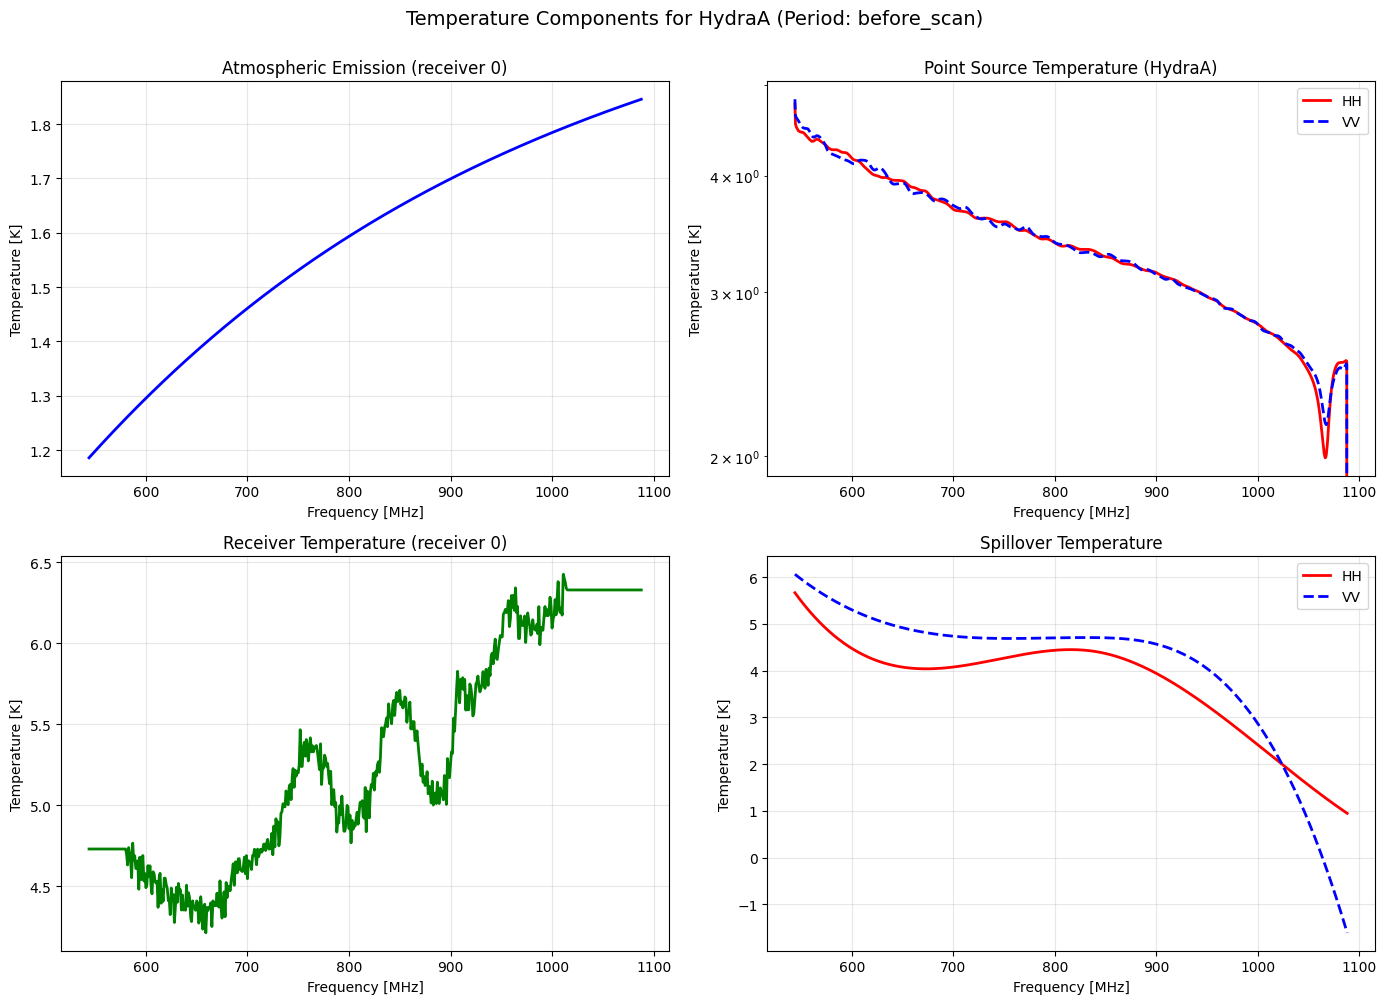

In [22]:
period = list(model_components.keys())[0]
period_data = model_components[period]

i_recv = 0  # First receiver
i_dump = n_dumps // 2  # Middle time dump

# Extract temperature components
atm_temp = period_data['temperatures']['atmospheric'][i_dump, :, i_recv]
point_source_HH = period_data['temperatures']['point_source_HH'][i_dump, :]
point_source_VV = period_data['temperatures']['point_source_VV'][i_dump, :]
receiver_temp = period_data['temperatures']['receiver'][:, i_recv]
spillover_HH = period_data['temperatures']['spillover_HH'][i_dump, :]
spillover_VV = period_data['temperatures']['spillover_VV'][i_dump, :]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Atmospheric
axes[0, 0].plot(freq_MHz, atm_temp, 'b-', linewidth=2)
axes[0, 0].set_xlabel('Frequency [MHz]')
axes[0, 0].set_ylabel('Temperature [K]')
axes[0, 0].set_title(f'Atmospheric Emission (receiver {i_recv})')
axes[0, 0].grid(True, alpha=0.3)

# Point source (both polarizations)
axes[0, 1].semilogy(freq_MHz, point_source_HH, 'r-', label='HH', linewidth=2)
axes[0, 1].semilogy(freq_MHz, point_source_VV, 'b--', label='VV', linewidth=2)
axes[0, 1].set_xlabel('Frequency [MHz]')
axes[0, 1].set_ylabel('Temperature [K]')
axes[0, 1].set_title(f'Point Source Temperature ({period_data["calibrator"]})')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Receiver temperature
axes[1, 0].plot(freq_MHz, receiver_temp, 'g-', linewidth=2)
axes[1, 0].set_xlabel('Frequency [MHz]')
axes[1, 0].set_ylabel('Temperature [K]')
axes[1, 0].set_title(f'Receiver Temperature (receiver {i_recv})')
axes[1, 0].grid(True, alpha=0.3)

# Spillover (both polarizations)
axes[1, 1].plot(freq_MHz, spillover_HH, 'r-', label='HH', linewidth=2)
axes[1, 1].plot(freq_MHz, spillover_VV, 'b--', label='VV', linewidth=2)
axes[1, 1].set_xlabel('Frequency [MHz]')
axes[1, 1].set_ylabel('Temperature [K]')
axes[1, 1].set_title('Spillover Temperature')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle(f'Temperature Components for {period_data["calibrator"]} (Period: {period})', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

## 7. Compare HH vs VV polarizations

/tmp/ipykernel_3727321/102411701.py:18: RuntimeWarning: invalid value encountered in divide
  ratio = beam_HH / beam_VV


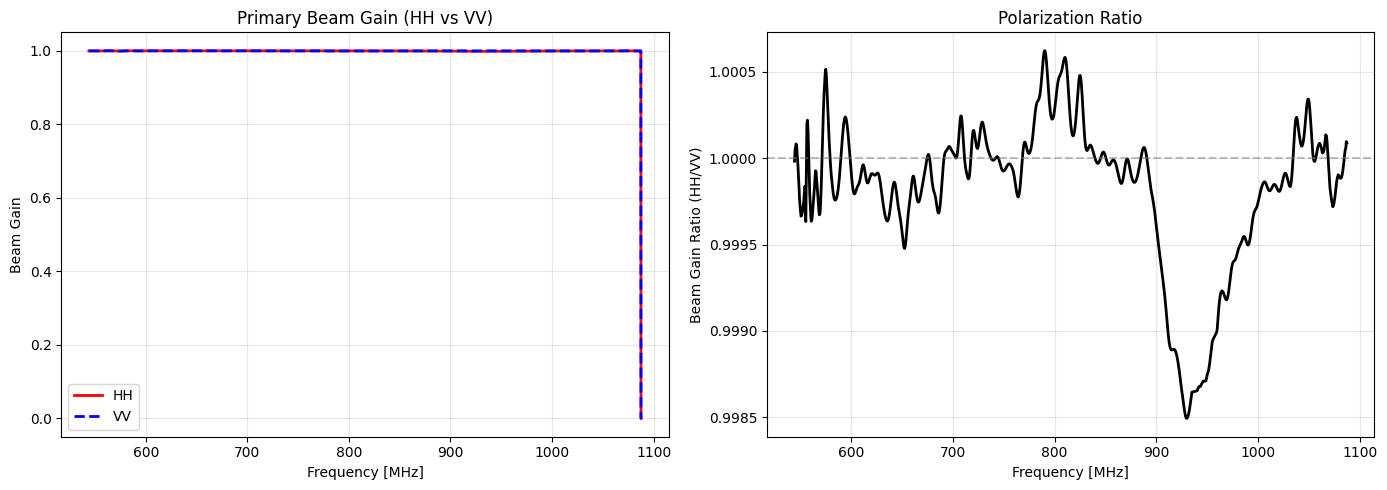

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

i_dump = n_dumps // 2

# Beam gain
beam_HH = period_data['beam_gain_HH'][i_dump, :]
beam_VV = period_data['beam_gain_VV'][i_dump, :]

axes[0].plot(freq_MHz, beam_HH, 'r-', label='HH', linewidth=2)
axes[0].plot(freq_MHz, beam_VV, 'b--', label='VV', linewidth=2)
axes[0].set_xlabel('Frequency [MHz]')
axes[0].set_ylabel('Beam Gain')
axes[0].set_title('Primary Beam Gain (HH vs VV)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Ratio HH/VV
ratio = beam_HH / beam_VV
axes[1].plot(freq_MHz, ratio, 'k-', linewidth=2)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel('Frequency [MHz]')
axes[1].set_ylabel('Beam Gain Ratio (HH/VV)')
axes[1].set_title('Polarization Ratio')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Access examples

Here are some examples of how to extract specific data from the structure.

Gain for period 'before_scan', receiver 0: shape (4096,)
Point source HH: shape (225, 4096)
Atmospheric at dump 0: shape (4096, 4)


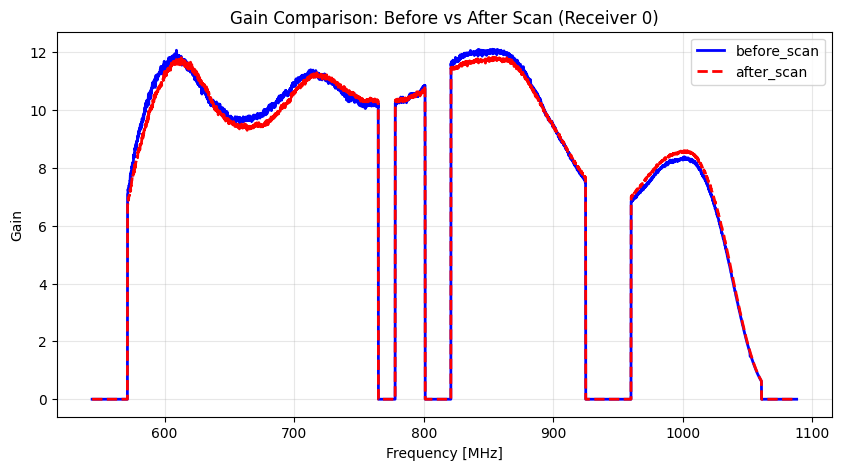

In [25]:
# Example 1: Get gain for specific period and receiver
period = 'before_scan'
i_receiver = 0
gain_recv = model_components[period]['gain'][:, i_receiver]  # (n_freq,)
print(f"Gain for period '{period}', receiver {i_receiver}: shape {gain_recv.shape}")

# Example 2: Get point source temperature for HH polarization
point_source_HH = model_components[period]['temperatures']['point_source_HH']  # (n_dumps, n_freq)
print(f"Point source HH: shape {point_source_HH.shape}")

# Example 3: Get atmospheric emission for all receivers at specific time
i_dump = 0
atm_time = model_components[period]['temperatures']['atmospheric'][i_dump, :, :]  # (n_freq, n_receivers)
print(f"Atmospheric at dump {i_dump}: shape {atm_time.shape}")

# Example 4: Compare gains between periods
periods = list(model_components.keys())
if len(periods) >= 2:
    gain_before = model_components[periods[0]]['gain'][:, 0]
    gain_after = model_components[periods[1]]['gain'][:, 0]
    
    plt.figure(figsize=(10, 5))
    plt.plot(freq_MHz, gain_before, 'b-', label=f"{periods[0]}", linewidth=2)
    plt.plot(freq_MHz, gain_after, 'r--', label=f"{periods[1]}", linewidth=2)
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Gain')
    plt.title('Gain Comparison: Before vs After Scan (Receiver 0)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## 9. Summary

The `model_components` structure efficiently stores:

**Per period:**
- Metadata: calibrator name, dump indices
- Receiver-independent data (no duplication):
  - `beam_gain_HH`, `beam_gain_VV`: (n_dumps, n_freq)
  - `point_source_HH`, `point_source_VV`: (n_dumps, n_freq)
  - `spillover_HH`, `spillover_VV`: (n_dumps, n_freq)
- Receiver-specific data:
  - `gain`: (n_freq, n_receivers)
  - `atmospheric`: (n_dumps, n_freq, n_receivers)
  - `receiver`: (n_freq, n_receivers)